In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import numpy.matlib

vehicles = pd.read_csv("vehicles.csv")

In [2]:
vehicles_dim = vehicles.shape

In [3]:
print("\n Input data has "+ str(vehicles_dim[0])+" observations and "+ str(vehicles_dim[1]) +" variables.")


 Input data has 387 observations and 18 variables.


In [4]:
data = vehicles.iloc[:,7:18]

In [5]:
data.describe()

,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,33231.180879,30440.653747,3.127390,5.757106,214.444444,20.312661,27.263566,3532.457364,107.211886,184.961240,71.276486
std,19724.634576,17901.179282,1.014314,1.490182,70.262822,5.262333,5.636005,706.003622,7.086553,13.237999,3.368329
min,10280.000000,9875.000000,1.400000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000,64.000000
25%,20997.000000,19575.000000,2.300000,4.000000,165.000000,18.000000,24.000000,3107.000000,103.000000,177.000000,69.000000
50%,28495.000000,26155.000000,3.000000,6.000000,210.000000,19.000000,27.000000,3469.000000,107.000000,186.000000,71.000000
75%,39552.500000,36124.000000,3.800000,6.000000,250.000000,21.500000,30.000000,3922.000000,112.000000,193.000000,73.000000
max,192465.000000,173560.000000,6.000000,12.000000,493.000000,60.000000,66.000000,6400.000000,130.000000,221.000000,81.000000


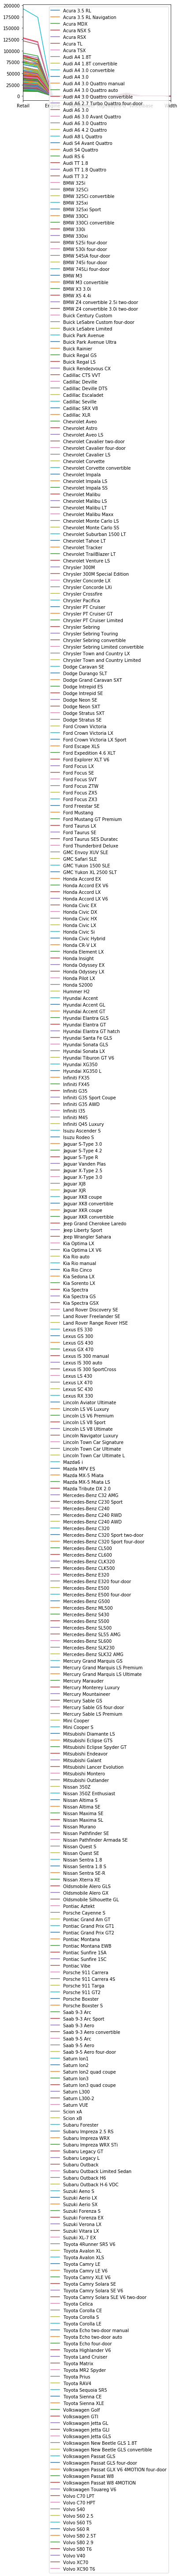

In [6]:
data.T.plot()
plt.show()

In [7]:
data_mean = np.mean(data,0)
print(data_mean)

Retail        33231.180879
Dealer        30440.653747
Engine            3.127390
Cylinders         5.757106
Horsepower      214.444444
CityMPG          20.312661
HighwayMPG       27.263566
Weight         3532.457364
Wheelbase       107.211886
Length          184.961240
Width            71.276486
dtype: float64


In [8]:
data_dim = data.shape

In [9]:
data_mean_mat = np.matlib.repmat(data_mean,data_dim[0],1)
print(data_mean_mat)

[[  3.32311809e+04   3.04406537e+04   3.12739018e+00 ...,   1.07211886e+02
    1.84961240e+02   7.12764858e+01]
 [  3.32311809e+04   3.04406537e+04   3.12739018e+00 ...,   1.07211886e+02
    1.84961240e+02   7.12764858e+01]
 [  3.32311809e+04   3.04406537e+04   3.12739018e+00 ...,   1.07211886e+02
    1.84961240e+02   7.12764858e+01]
 ..., 
 [  3.32311809e+04   3.04406537e+04   3.12739018e+00 ...,   1.07211886e+02
    1.84961240e+02   7.12764858e+01]
 [  3.32311809e+04   3.04406537e+04   3.12739018e+00 ...,   1.07211886e+02
    1.84961240e+02   7.12764858e+01]
 [  3.32311809e+04   3.04406537e+04   3.12739018e+00 ...,   1.07211886e+02
    1.84961240e+02   7.12764858e+01]]


In [10]:
c = (data - data_mean_mat)/data.std()

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA()
pca.fit(c)
print(pca.components_)

[[ -2.63750443e-01  -2.62318639e-01  -3.47080492e-01  -3.34188758e-01
   -3.18602258e-01   3.10481727e-01   3.06588639e-01  -3.36329367e-01
   -2.66210034e-01  -2.56790188e-01  -2.96054591e-01]
 [  4.68508698e-01   4.70146585e-01  -1.53471865e-02   7.80320109e-02
    2.92213476e-01  -3.36593576e-03  -1.09644601e-02  -1.67463572e-01
   -4.18177107e-01  -4.08411381e-01  -3.12891350e-01]
 [  2.54974141e-01   2.57250393e-01   4.71942200e-02   8.14492644e-02
    7.63808718e-02   5.35062956e-01   5.98997665e-01  -1.12218654e-01
    2.64453449e-01   3.44707949e-01   8.75917569e-02]
 [  2.79883716e-01   2.87719583e-01  -5.25370845e-01  -6.39799561e-01
   -5.83430897e-02  -1.86275569e-01  -1.25744402e-01   1.19546112e-01
    2.20703971e-01   1.68494079e-01   9.06565824e-02]
 [  4.97451938e-02   3.68199647e-02   5.19954707e-02  -1.25728799e-01
   -1.19916969e-01   3.25728373e-01   3.97468830e-02   3.97216980e-01
   -2.24878406e-01  -4.56315239e-01   6.62589129e-01]
 [  3.24927801e-02   4.8557763

In [13]:
print(pca.explained_variance_)

[  7.10463843e+00   1.88392477e+00   8.49728285e-01   3.57015489e-01
   2.75435593e-01   1.97943715e-01   1.40519209e-01   8.66388119e-02
   6.63879807e-02   3.69773622e-02   7.90354739e-04]


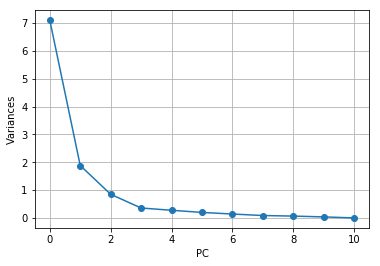

In [14]:
ax = plt.plot(pca.explained_variance_, marker='o')

plt.xlabel("PC")
plt.ylabel("Variances")
plt.grid(True)
plt.show()

In [15]:
components = pca.components_.T

In [16]:
print(components)

[[ -2.63750443e-01   4.68508698e-01   2.54974141e-01   2.79883716e-01
    4.97451938e-02   3.24927801e-02  -2.22419660e-01  -5.17333383e-02
    9.06977418e-02   2.42228043e-02   7.09294413e-01]
 [ -2.62318639e-01   4.70146585e-01   2.57250393e-01   2.87719583e-01
    3.68199647e-02   4.85577636e-02  -2.19443746e-01  -6.69249641e-02
    8.66844197e-02   2.82966805e-02  -7.04647310e-01]
 [ -3.47080492e-01  -1.53471865e-02   4.71942200e-02  -5.25370845e-01
    5.19954707e-02   5.36650683e-03  -5.17242393e-02   3.58461569e-01
    6.83332423e-01  -1.09972893e-02  -9.55061652e-03]
 [ -3.34188758e-01   7.80320109e-02   8.14492644e-02  -6.39799561e-01
   -1.25728799e-01   9.28937427e-02  -2.39974294e-01  -4.23251772e-01
   -4.52827436e-01  -4.14078528e-03   3.85797508e-03]
 [ -3.18602258e-01   2.92213476e-01   7.63808718e-02  -5.83430897e-02
   -1.19916969e-01  -2.08117703e-01   8.13529057e-01   1.80257941e-01
   -2.27458995e-01   1.05747481e-02  -1.00131090e-03]
 [  3.10481727e-01  -3.3659357

In [17]:
print(components[:,0])

[-0.26375044 -0.26231864 -0.34708049 -0.33418876 -0.31860226  0.31048173
  0.30658864 -0.33632937 -0.26621003 -0.25679019 -0.29605459]


In [18]:
print(components[:,1])

[ 0.4685087   0.47014659 -0.01534719  0.07803201  0.29221348 -0.00336594
 -0.01096446 -0.16746357 -0.41817711 -0.40841138 -0.31289135]


In [19]:
newdata = pca.transform(c)
print(newdata)

[[-1.56541663 -0.44669421  0.28701711 ...,  0.22029751  0.20332981
   0.04823058]
 [-1.63353373 -0.33929273  0.34524088 ...,  0.2349952   0.2039028
   0.0504077 ]
 [-1.90415365 -0.41060707 -0.55198129 ..., -0.43226542 -0.12294837
  -0.00328422]
 ..., 
 [ 2.34548209  0.40889986 -0.35369847 ..., -0.07675361  0.14888135
  -0.01948846]
 [-0.06104535 -0.30720574  0.01816158 ..., -0.22455186 -0.07335897
  -0.03457982]
 [-2.30826445 -0.40650713 -0.78445469 ..., -0.57139447 -0.00873628
  -0.04108179]]


In [20]:
print(pca.explained_variance_ratio_)

[  6.45876221e-01   1.71265888e-01   7.72480259e-02   3.24559536e-02
   2.50395994e-02   1.79948832e-02   1.27744735e-02   7.87625563e-03
   6.03527097e-03   3.36157838e-03   7.18504308e-05]


In [21]:
cratio = np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_)
print(cratio)

[ 0.64587622  0.81714211  0.89439013  0.92684609  0.95188569  0.96988057
  0.98265504  0.9905313   0.99656657  0.99992815  1.        ]


In [22]:
k = 5
reduced_data = newdata[:k]
d_dim=reduced_data.shape
print(d_dim)

(5, 11)


In [23]:
d = newdata[:,:5]
print(d)

[[-1.56541663 -0.44669421  0.28701711  0.60986085 -0.46565572]
 [-1.63353373 -0.33929273  0.34524088  0.67886419 -0.44813694]
 [-1.90415365 -0.41060707 -0.55198129  0.29561747  1.23445167]
 ..., 
 [ 2.34548209  0.40889986 -0.35369847  0.6695688  -0.42806049]
 [-0.06104535 -0.30720574  0.01816158  0.90690512  0.4417788 ]
 [-2.30826445 -0.40650713 -0.78445469  1.08718349  0.56547644]]


In [1]:
xvector = pca.components_[0] 
yvector = pca.components_[1]

xs = pca.transform(c)[:,0] 
ys = pca.transform(c)[:,1]


## visualize projections

for i in range(len(xs)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.plot(xs[i], ys[i], 'bo',alpha=0.3)
    #plt.text(xs[i]*1.2, ys[i]*1.2, list(c.index)[i], color='g',alpha=0.4)

for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(c.columns.values)[i], color='r')

plt.show()

NameError: name 'pca' is not defined

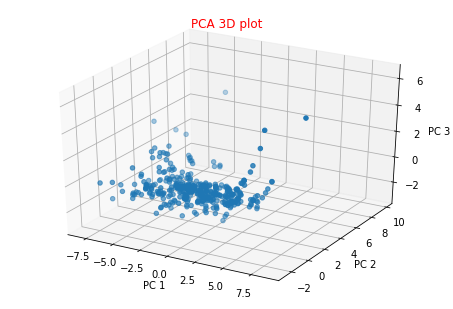

In [27]:
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

label =c.columns.values

pca = PCA(n_components=3)
pca.fit(c)
newdata = pca.transform(c)

plt.clf()
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(newdata[:,0],newdata[:,1],newdata[:,2], cmap= cm.coolwarm)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('PCA 3D plot', color='r')
plt.show()

In [ ]:
data['Name'] = data.index

In [30]:
from plotly.offline import plot
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x = reduced_data[:,0],
    y = reduced_data[:,1],
    z = reduced_data[:,2],
    mode='markers',
    marker=dict(
        size=12,
        color= 'Name',                
        opacity=1
)

)

dc_1 = go.Scatter3d( x = [0,pca.components_.T[0][0]],
                     y = [0,pca.components_.T[0][1]],
                     z = [0,pca.components_.T[0][2]],
                     marker = dict( size = 1,
                                    color = "rgb(84,48,5)"),
                     line = dict( color = "red",
                                width = 6),
                     name = "PC1"
                     )
dc_2 = go.Scatter3d( x = [0,pca.components_.T[1][0]],
                   y = [0,pca.components_.T[1][1]],
                   z = [0,pca.components_.T[1][2]],
                   marker = dict( size = 1,
                                  color = "rgb(84,48,5)"),
                   line = dict( color = "green",
                                width = 6),
                   name = "PC2"
                 )
dc_3 = go.Scatter3d( x = [0,pca.components_.T[2][0]],
                     y = [0,pca.components_.T[2][1]],
                     z = [0,pca.components_.T[2][2]],
                     marker = dict( size = 1,
                                  color = "rgb(84,48,5)"),
                     line = dict( color = "blue",
                                width = 6),
                     name = "PC3"
                 ) 

dc_4 = go.Scatter3d( x = [0,pca.components_.T[3][0]],
                     y = [0,pca.components_.T[3][1]],
                     z = [0,pca.components_.T[3][2]],
                     marker = dict( size = 1,
                                  color = "rgb(84,48,5)"),
                     line = dict( color = "yellow",
                                width = 6),
                     name = "PC4"
                   )

data11 = [trace1,dc_1,dc_2,dc_3,dc_4]
layout = go.Layout(
    xaxis=dict(
        title='PC1',
        titlefont=dict(
           family='Courier New, monospace',
           size=18,
           color='#7f7f7f'
       )
   )
)
fig = go.Figure(data=data11, layout=layout)
plot(fig, filename='3d')

AttributeError: 'module' object has no attribute 'reduced_data'